In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
#read dataset insurance.csv
df_train = pd.read_csv('Downloads/insurance.csv')
#print data
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#missing values
total = df_train.isnull().sum().sort_values(ascending=False) #total no of missing values
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [4]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#descriptive statistical summary
df_train['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [6]:
df_train['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [7]:
df_train['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [8]:
df_train['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


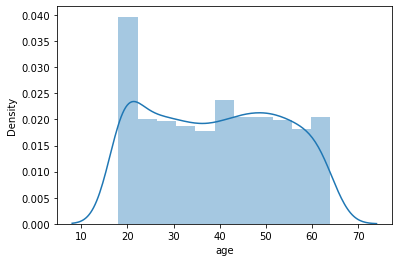

In [9]:
#univariate Analysis
#Histogram of age
sns.distplot(df_train['age']);

In [10]:
#skewness and kurtosis of age
print("Skewness: %f" % df_train['age'].skew())
print("Kurtosis: %f" % df_train['age'].kurt())

Skewness: 0.055673
Kurtosis: -1.245088


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


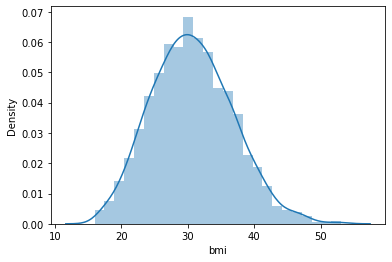

In [11]:
#Histogram of bmi
sns.distplot(df_train['bmi']);

In [12]:
#skewness and kurtosis of bmi
print("Skewness: %f" % df_train['bmi'].skew())
print("Kurtosis: %f" % df_train['bmi'].kurt())

Skewness: 0.284047
Kurtosis: -0.050732


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


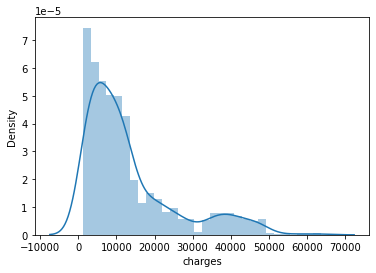

In [13]:
#Histogram of charges
sns.distplot(df_train['charges']);

In [14]:
#skewness and kurtosis of charges
print("Skewness: %f" % df_train['charges'].skew())
print("Kurtosis: %f" % df_train['charges'].kurt())

Skewness: 1.515880
Kurtosis: 1.606299


In [15]:
#standardizing data "charges"
charges_scaled = StandardScaler().fit_transform(df_train['charges'][:,np.newaxis]);
low_range = charges_scaled[charges_scaled[:,0].argsort()][:10]
high_range = charges_scaled[charges_scaled[:,0].argsort()][-10:]
print("Outer range (low) of the distribution: ")
print(low_range)
print("\nouter range (high) of the distribution: ")
print(high_range)

Outer range (low) of the distribution: 
[[-1.00355735]
 [-1.00276162]
 [-1.00239533]
 [-1.00235743]
 [-1.00230691]
 [-1.00226902]
 [-1.00194062]
 [-1.00149855]
 [-1.00128383]
 [-1.00012181]]

outer range (high) of the distribution: 
[[2.94203111]
 [2.94906197]
 [2.99923879]
 [3.13280608]
 [3.24814803]
 [3.45834801]
 [3.74215922]
 [3.86196644]
 [4.07438867]
 [4.17166316]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14816\3506312641.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  charges_scaled = StandardScaler().fit_transform(df_train['charges'][:,np.newaxis]);


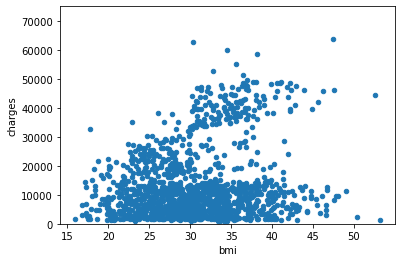

In [16]:
#bivariate analysis charges/age
var = 'bmi'
data = pd.concat([df_train['charges'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='charges', ylim=(0,75000));

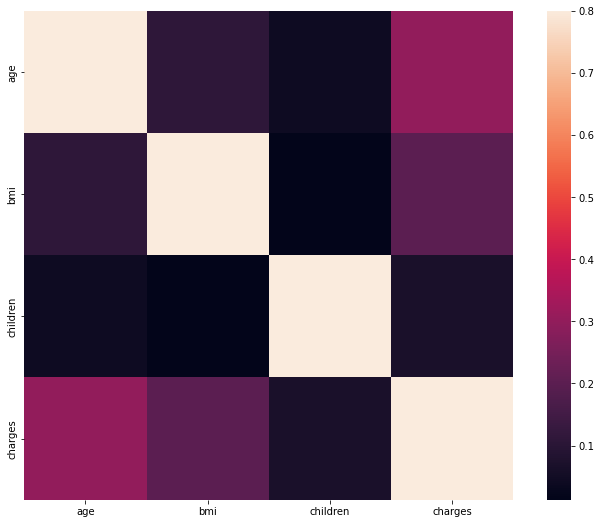

In [17]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

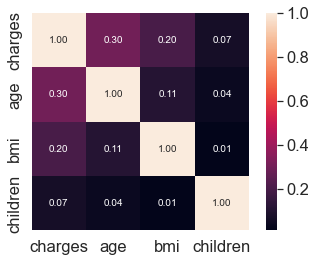

In [18]:
#charges correlation matrix
k = 7 # number of variables for heatmap
cols = corrmat.nlargest(k, 'charges')['charges'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

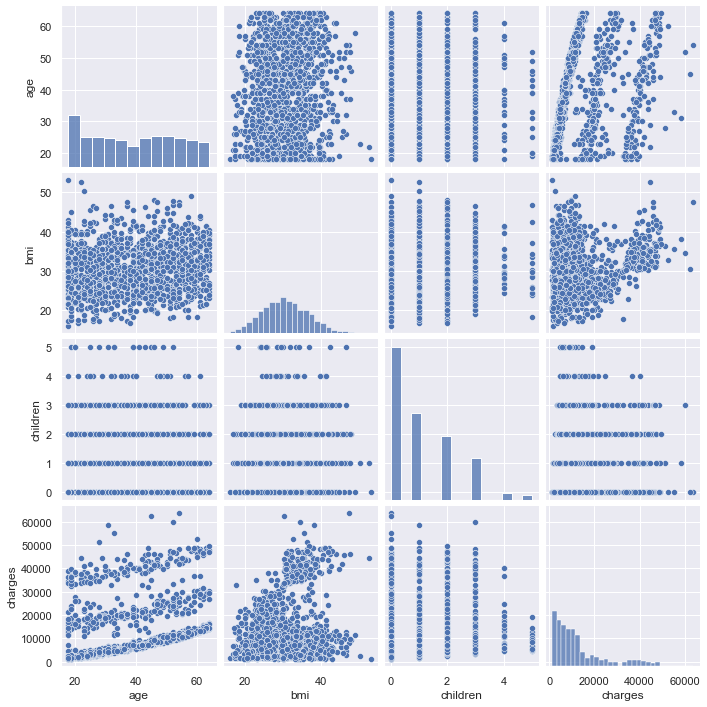

In [19]:
#scatterplot
sns.set()
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();